In [ ]:
import numpy as np      
import pandas as pd       
import matplotlib.pyplot as plt   
import seaborn as sns
import time
import re
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction import DictVectorizer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, HashingVectorizer
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [ ]:
train = pd.read_csv(path+'news_train.csv')
test = pd.read_csv(path + 'news_test.csv')
submission = pd.read_csv(path + 'sample_submission.csv')

In [ ]:
train.head()

,n_id,date,title,content,ord,info
0,NEWS02580,20200605,[마감]코스닥 기관 678억 순매도,[이데일리 MARKETPOINT]15:32 현재 코스닥 기관 678억 순매도,1,0
1,NEWS02580,20200605,[마감]코스닥 기관 678억 순매도,"""실적기반"" 저가에 매집해야 할 8월 급등유망주 TOP 5 전격공개",2,1
2,NEWS02580,20200605,[마감]코스닥 기관 678억 순매도,"하이스탁론, 선취수수료 없는 월 0.4% 최저금리 상품 출시",3,1
3,NEWS02580,20200605,[마감]코스닥 기관 678억 순매도,종합 경제정보 미디어 이데일리 - 무단전재 & 재배포 금지,4,0
4,NEWS09727,20200626,"롯데·공영 등 7개 TV 홈쇼핑들, 동행세일 동참",전국적인 소비 붐 조성에 기여할 예정,1,0


진짜 뉴스 개수 : 71813
가짜 뉴스 개수 : 46932
진짜 뉴스 비율 : 60.477%
가짜 뉴스 비율 : 39.523%


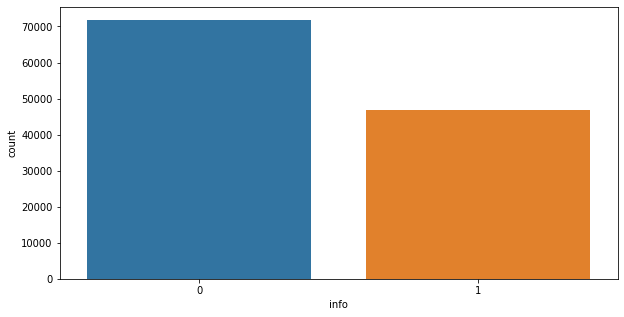

In [ ]:
plt.figure(figsize=(10,5))
sns.countplot(data=train, x="info")

print("진짜 뉴스 개수 : {}".format(len(train.loc[train['info']==0])))
print("가짜 뉴스 개수 : {}".format(len(train.loc[train['info']==1])))
print("진짜 뉴스 비율 : {}%".format(round((len(train.loc[train['info']==0])) / len(train.index) * 100, 3)))
print("가짜 뉴스 비율 : {}%".format(round((len(train.loc[train['info']==1])) / len(train.index) * 100, 3)))

In [ ]:
# Define the dataset
X_train = train['content'].values.astype('str')
y_train = train['info']
X_test = test['content'].values.astype('str')

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [ ]:
print(X_train.shape)
print(X_val.shape)

print(y_train.shape)
print(y_val.shape)

(94996,)
(23749,)
(94996,)
(23749,)


## CountVectorizer - PassiveAggressiveClassifier

In [ ]:
# Time Check
start = time.time()

# Initialize a CountVectorizer
count_vectorizer = CountVectorizer(max_df=0.8, ngram_range=(1,2))

# Fit & transform train set, transform test set
count_train = count_vectorizer.fit_transform(X_train)
count_val = count_vectorizer.transform(X_val)
count_test = count_vectorizer.transform(X_test)

# Initialize the PassiveAggressiveClassifier and fit trainig sets
pa_classifier = PassiveAggressiveClassifier(C = 0.01, max_iter=1000, loss = 'squared_hinge', early_stopping=True, validation_fraction=0.1)

# Create a parameter grid to search for best parameters for everything in the pipeline
param_grid = {'C' : [0.003, 0.01, 0.03, 0.1], 
              'max_iter' : [100, 1000, 10000],
              'loss': ['hinge', 'squared_hinge'], 
              'validation_fraction': [0.1, 0.2, 0.3]}

model = GridSearchCV(pa_classifier, param_grid, scoring = 'accuracy')
model.fit(count_train, y_train)
print(model.best_score_)
print(model.best_params_)
y_pred = model.predict(count_test)

# Predict the Validation Dataset 
pred_val = model.predict(count_val)
print(f'Validation accuracy: {accuracy_score(y_val, pred_val)}')

matrix = confusion_matrix(y_val, pred_val)
score = 1-(matrix[0][1]+matrix[1][0])/(len(X_val))
print(matrix)
print(f'대회 Accuracy: {round(score*100,3)}%')

# Predict and make submission.csv
df = pd.DataFrame({'id': test['id'], 'info': y_pred})
df.to_csv(path + "sample_submission_0.csv", mode='w', index=False)

# Print time
print("time: {:.4f}".format(time.time()-start))

0.9785990897027821
{'C': 0.1, 'loss': 'squared_hinge', 'max_iter': 10000, 'validation_fraction': 0.1}
Validation accuracy: 0.9785254115962777
[[14377    96]
 [  414  8862]]
대회 Accuracy: 99.571%
time: 123.9010


## TfidfVectorizer - PassiveAggressiveClassifier

In [ ]:
# Time Check
start = time.time()

# Initialize a TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(max_df=0.8, ngram_range=(1,2))

# Fit & transform train set, transform test set
tfidf_train = tfidf_vectorizer.fit_transform(X_train)
tfidf_val = tfidf_vectorizer.transform(X_val)
tfidf_test = tfidf_vectorizer.transform(X_test)

# Initialize the PassiveAggressiveClassifier and fit trainig sets
pa_classifier = PassiveAggressiveClassifier(C = 0.01, max_iter=1000, loss = 'squared_hinge', early_stopping=True, validation_fraction=0.1)

# Create a parameter grid to search for best parameters for everything in the pipeline
param_grid = {'C' : [0.003, 0.01, 0.03, 0.1], 
              'max_iter' : [100, 1000, 10000],
              'loss': ['hinge', 'squared_hinge'], 
              'validation_fraction': [0.1, 0.2, 0.3]}

model = GridSearchCV(pa_classifier, param_grid, scoring = 'accuracy')
model.fit(tfidf_train, y_train)
print(model.best_score_)
print(model.best_params_)
y_pred = model.predict(tfidf_test)

# Predict the Validation Dataset 
pred_val = model.predict(tfidf_val)
print(f'Validation accuracy: {accuracy_score(y_val, pred_val)}')

matrix = confusion_matrix(y_val, pred_val)
score = 1-(matrix[0][1]+matrix[1][0])/(len(X_val))
print(matrix)
print(f'대회 Accuracy: {round(score*100,3)}%')

# Predict and make submission.csv
df = pd.DataFrame({'id': test['id'], 'info': y_pred})
df.to_csv(path + "sample_submission_1.csv", mode='w', index=False)

# Print time
print("time: {:.4f}".format(time.time()-start))

0.9742831234884939
{'C': 0.1, 'loss': 'squared_hinge', 'max_iter': 1000, 'validation_fraction': 0.1}
Validation accuracy: 0.9799991578592783
[[14404    69]
 [  406  8870]]
대회 Accuracy: 99.6%
time: 114.0177


## HashingVectorizer - PassiveAggressiveClassifier

In [ ]:
# Time Check
start = time.time()

# Initialize a HashingVectorizer
hashing_vectorizer = HashingVectorizer(ngram_range=(1,2))

# Fit & transform train set, transform test set
hash_train = hashing_vectorizer.fit_transform(X_train) 
hash_val = hashing_vectorizer.transform(X_val)
hash_test = hashing_vectorizer.transform(X_test)

# Initialize the PassiveAggressiveClassifier and fit trainig sets
pa_classifier = PassiveAggressiveClassifier(C = 0.01, max_iter=1000, loss = 'squared_hinge', early_stopping=True, validation_fraction=0.1)

# Create a parameter grid to search for best parameters for everything in the pipeline
param_grid = {'C' : [0.003, 0.01, 0.03, 0.1], 
              'max_iter' : [100, 1000, 10000],
              'loss': ['hinge', 'squared_hinge'], 
              'validation_fraction': [0.1, 0.2, 0.3]}

model = GridSearchCV(pa_classifier, param_grid, scoring = 'accuracy')
model.fit(hash_train, y_train)
print(model.best_score_)
print(model.best_params_)
y_pred = model.predict(hash_test)

# Predict the Validation Dataset 
pred_val = model.predict(hash_val)
print(f'Validation accuracy: {accuracy_score(y_val, pred_val)}')

matrix = confusion_matrix(y_val, pred_val)
score = 1-(matrix[0][1]+matrix[1][0])/(len(X_val))
print(matrix)
print(f'대회 Accuracy: {round(score*100,3)}%')

# Predict and make submission.csv
df = pd.DataFrame({'id': test['id'], 'info': y_pred})
df.to_csv(path + "sample_submission_2.csv", mode='w', index=False)

# Print time
print("time: {:.4f}".format(time.time()-start))

0.976925341776991
{'C': 0.1, 'loss': 'squared_hinge', 'max_iter': 10000, 'validation_fraction': 0.1}
Validation accuracy: 0.977388521621963
[[14422    51]
 [  486  8790]]
대회 Accuracy: 99.548%
time: 125.7289


## TfidfVectorizer - Logistic Regression


In [ ]:
# Time Check
start = time.time()

# Initialize a TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(max_df=0.8, ngram_range=(1,2))

# Fit & transform train set, transform test set
tfidf_train = tfidf_vectorizer.fit_transform(X_train)
tfidf_val = tfidf_vectorizer.transform(X_val)
tfidf_test = tfidf_vectorizer.transform(X_test)

# Initialize the Logistic Regression and fit trainig sets
model = LogisticRegression()
model.fit(tfidf_train, y_train)
y_pred = model.predict(tfidf_test)

# Predict the Validation Dataset 
pred_val = model.predict(tfidf_val)
print(f'Validation accuracy: {accuracy_score(y_val, pred_val)}')

matrix = confusion_matrix(y_val, pred_val)
score = 1-(matrix[0][1]+matrix[1][0])/(len(X_val))
print(matrix)
print(f'대회 Accuracy: {round(score*100,3)}%')

# Predict and make submission.csv
df = pd.DataFrame({'id': test['id'], 'info': y_pred})
df.to_csv(path + "sample_submission_3.csv", mode='w', index=False)

# Print time
print("time: {:.4f}".format(time.time()-start))

Validation accuracy: 0.9587351046359847
[[14444    29]
 [  951  8325]]
대회 Accuracy: 99.175%
time: 22.8745


## TfidfVectorizer -  Naive Bayes

In [ ]:
# Time Check
start = time.time()

# Initialize a TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(max_df=0.8, ngram_range=(1,2))

# Fit & transform train set, transform test set
tfidf_train = tfidf_vectorizer.fit_transform(X_train)
tfidf_val = tfidf_vectorizer.transform(X_val)
tfidf_test = tfidf_vectorizer.transform(X_test)

# Initialize the Multinomial Naive Bayes and fit trainig sets
nb = MultinomialNB(alpha = 1.0, fit_prior = True)

# Create a parameter grid to search for best parameters for everything in the pipeline
param_grid = {'alpha' : np.logspace(-4, 4, 20), 
              'fit_prior' : [True, False]}
              
model = GridSearchCV(nb, param_grid, scoring = 'accuracy')
model.fit(tfidf_train, y_train)
print(model.best_score_)
print(model.best_params_)
y_pred = model.predict(tfidf_test)

# Predict the Validation Dataset 
pred_val = model.predict(tfidf_val)
print(f'Validation accuracy: {accuracy_score(y_val, pred_val)}')

matrix = confusion_matrix(y_val, pred_val)
score = 1-(matrix[0][1]+matrix[1][0])/(len(X_val))
print(matrix)
print(f'대회 Accuracy: {round(score*100,3)}%')

# Predict and make submission.csv
df = pd.DataFrame({'id': test['id'], 'info': y_pred})
df.to_csv(path + "sample_submission_4.csv", mode='w', index=False)

# Print time
print("time: {:.4f}".format(time.time()-start))

0.9762516426072286
{'alpha': 0.004832930238571752, 'fit_prior': True}
Validation accuracy: 0.9745252431681334
[[14409    64]
 [  541  8735]]
대회 Accuracy: 99.491%
time: 25.0851


## TfidfVectorizer - Ensemble
- Voting

In [ ]:
# Time Check
start = time.time()

# Initialize a TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(max_df=0.8, ngram_range=(1,2))

# Fit & transform train set, transform test set
tfidf_train = tfidf_vectorizer.fit_transform(X_train)
tfidf_val = tfidf_vectorizer.transform(X_val)
tfidf_test = tfidf_vectorizer.transform(X_test)

# Initialize and fit trainig sets
log_clf = LogisticRegression()
dt_clf = DecisionTreeClassifier(random_state=1)
svm_clf = SVC(probability=True)

# Create a Votingclassifier 
model = VotingClassifier(
    estimators=[('lr', log_clf), 
                ('dt', dt_clf), 
                ('svc', svm_clf)],
                voting='soft')
              
model.fit(tfidf_train, y_train)
print(model.best_score_)
print(model.best_params_)
y_pred = model.predict(tfidf_test)

# Predict the Validation Dataset 
pred_val = model.predict(tfidf_val)
print(f'Validation accuracy: {accuracy_score(y_val, pred_val)}')

matrix = confusion_matrix(y_val, pred_val)
score = 1-(matrix[0][1]+matrix[1][0])/(len(X_val))
print(matrix)
print(f'대회 Accuracy: {round(score*100,3)}%')

# Predict and make submission.csv
df = pd.DataFrame({'id': test['id'], 'info': y_pred})
df.to_csv(path + "sample_submission_5.csv", mode='w', index=False)

# Print time
print("time: {:.4f}".format(time.time()-start))

## TfidfVectorizer - Ensemble
- Bagging

In [ ]:
# Time Check
start = time.time()

# Initialize a TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(max_df=0.8, ngram_range=(1,2))

# Fit & transform train set, transform test set
tfidf_train = tfidf_vectorizer.fit_transform(X_train)
tfidf_val = tfidf_vectorizer.transform(X_val)
tfidf_test = tfidf_vectorizer.transform(X_test)

# Create a Baggingclassifier 
model = BaggingClassifier(
    DecisionTreeClassifier(random_state=1), n_estimators=300,
    max_samples=500, random_state=1)
          
model.fit(tfidf_train, y_train)
y_pred = model.predict(tfidf_test)

# Predict the Validation Dataset 
pred_val = model.predict(tfidf_val)
print(f'Validation accuracy: {accuracy_score(y_val, pred_val)}')

matrix = confusion_matrix(y_val, pred_val)
score = 1-(matrix[0][1]+matrix[1][0])/(len(X_val))
print(matrix)
print(f'대회 Accuracy: {round(score*100,3)}%')

# Predict and make submission.csv
df = pd.DataFrame({'id': test['id'], 'info': y_pred})
df.to_csv(path + "sample_submission_6.csv", mode='w', index=False)

# Print time
print("time: {:.4f}".format(time.time()-start))

## TfidfVectorizer - RandomForest

In [ ]:
# Time Check
start = time.time()

# Initialize a TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(max_df=0.8, ngram_range=(1,2))

# Fit & transform train set, transform test set
tfidf_train = tfidf_vectorizer.fit_transform(X_train)
tfidf_val = tfidf_vectorizer.transform(X_val)
tfidf_test = tfidf_vectorizer.transform(X_test)

# Initialize the RandomForest and fit trainig sets
rf_clf = RandomForestClassifier(n_estimators=300, random_state=1)

# Create a parameter grid to search for best parameters for everything in the pipeline
param_grid = {'n_estimators' : [100, 200, 300], 
              'max_features': ['auto', 0.2, 0.5], 
              'min_samples_leaf': [1, 5], 
              'max_depth': [None, 10], 
              'max_samples': [1000]}
              
model = GridSearchCV(rf_clf, param_grid, scoring = 'accuracy')
model.fit(tfidf_train, y_train)
print(model.best_score_)
print(model.best_params_)
y_pred = model.predict(tfidf_test)

# Predict the Validation Dataset 
pred_val = model.predict(tfidf_val)
print(f'Validation accuracy: {accuracy_score(y_val, pred_val)}')

matrix = confusion_matrix(y_val, pred_val)
score = 1-(matrix[0][1]+matrix[1][0])/(len(X_val))
print(matrix)
print(f'대회 Accuracy: {round(score*100,3)}%')

# Predict and make submission.csv
df = pd.DataFrame({'id': test['id'], 'info': y_pred})
df.to_csv(path + "sample_submission_7.csv", mode='w', index=False)

# Print time
print("time: {:.4f}".format(time.time()-start))

## TfidfVectorizer - XGBoost

In [ ]:
# Time Check
start = time.time()

# Initialize a TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(max_df=0.8, ngram_range=(1,2))

# Fit & transform train set, transform test set
tfidf_train = tfidf_vectorizer.fit_transform(X_train)
tfidf_val = tfidf_vectorizer.transform(X_val)
tfidf_test = tfidf_vectorizer.transform(X_test)

# Initialize the XGBoost and fit trainig sets
xgb = xgb.XGBClassifier(max_depth=7, n_estimators=200, colsample_bytree=0.8, 
                        subsample=0.8, nthread=10, learning_rate=0.1)

# Create a parameter grid to search for best parameters for everything in the pipeline
param_grid = {'n_estimators' : [100, 200, 300], 
              'max_depth': [3, 5, 7, 10], 
              'colsample_bytes': [0.5, 0.8], 
              'subsample': [0.5, 0.8], 
              'nthread': [3, 4, 5],
               }
              
model = GridSearchCV(xgb, param_grid, scoring = 'accuracy')
model.fit(tfidf_train, y_train)
print(model.best_score_)
print(model.best_params_)
y_pred = model.predict(tfidf_test)

# Predict the Validation Dataset 
pred_val = model.predict(tfidf_val)
print(f'Validation accuracy: {accuracy_score(y_val, pred_val)}')

matrix = confusion_matrix(y_val, pred_val)
score = 1-(matrix[0][1]+matrix[1][0])/(len(X_val))
print(matrix)
print(f'대회 Accuracy: {round(score*100,3)}%')

# Predict and make submission.csv
df = pd.DataFrame({'id': test['id'], 'info': y_pred})
df.to_csv(path + "sample_submission_8.csv", mode='w', index=False)

# Print time
print("time: {:.4f}".format(time.time()-start))